# COVID-19 CASE STUDY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Dataset

In [2]:
confirmed_cases = pd.read_csv("covid_19_confirmed_v1.csv")
deaths = pd.read_csv("covid_19_deaths_v1.csv")
recovered_cases = pd.read_csv("covid_19_recovered_v1.csv")

# 2. Data Exploration

### 2.1 Confirmed Cases Dataframe Exploration

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [4]:
confirmed_cases.shape

(276, 498)

In [5]:
confirmed_cases.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [6]:
confirmed_cases.index

RangeIndex(start=0, stop=276, step=1)

In [7]:
confirmed_cases.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [8]:
confirmed_cases.values

array([[nan, 'Afghanistan', 33.93911, ..., 68366, 69130, 70111],
       [nan, 'Albania', 41.1533, ..., 132264, 132285, 132297],
       [nan, 'Algeria', 28.0339, ..., 127926, 128198, 128456],
       ...,
       [nan, 'Yemen', 15.552727, ..., 6696, 6723, 6731],
       [nan, 'Zambia', -13.133897, ..., 93947, 94430, 94751],
       [nan, 'Zimbabwe', -19.015438, ..., 38854, 38918, 38933]],
      dtype=object)

In [9]:
confirmed_cases.size # No. of Rows * Columns

137448

In [10]:
confirmed_cases.empty

False

In [11]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


In [12]:
confirmed_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
count,274.000000,274.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02,2.760000e+02
mean,20.447559,22.328281,2.018116,2.373188,3.409420,5.192029,7.673913,10.605072,20.210145,22.344203,...,5.984867e+05,6.007543e+05,6.028478e+05,6.045727e+05,6.062187e+05,6.081457e+05,6.102044e+05,6.122130e+05,6.140244e+05,6.157665e+05
std,25.189838,74.369096,26.781738,26.879567,33.464159,46.575328,65.089830,87.699030,215.201418,216.521511,...,2.797198e+06,2.808982e+06,2.819859e+06,2.828976e+06,2.837786e+06,2.847660e+06,2.857958e+06,2.867378e+06,2.875765e+06,2.883996e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.933349,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.316250e+03,1.328250e+03,1.335000e+03,1.346250e+03,1.351500e+03
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.869000e+04,1.888950e+04,1.897900e+04,1.899650e+04,1.901950e+04,1.904750e+04,1.907100e+04,1.909950e+04,1.913300e+04,1.916150e+04
75%,40.950592,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.504960e+05,2.512458e+05,2.518208e+05,2.522262e+05,2.525150e+05,2.527770e+05,2.530820e+05,2.533535e+05,2.535725e+05,2.540952e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,3.305676e+07,3.308511e+07,3.310488e+07,3.311774e+07,3.314366e+07,3.316642e+07,3.319047e+07,3.321800e+07,3.323996e+07,3.325194e+07


### 2.2 Deaths  Dataframe Exploration

In [13]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [14]:
deaths.shape

(276, 498)

In [15]:
deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [16]:
deaths.values

array([[nan, 'Afghanistan', 33.93911, ..., 2869, 2881, 2899],
       [nan, 'Albania', 41.1533, ..., 2447, 2448, 2449],
       [nan, 'Algeria', 28.0339, ..., 3448, 3455, 3460],
       ...,
       [nan, 'Yemen', 15.552727, ..., 1315, 1316, 1319],
       [nan, 'Zambia', -13.133897, ..., 1275, 1275, 1276],
       [nan, 'Zimbabwe', -19.015438, ..., 1592, 1592, 1594]], dtype=object)

In [17]:
deaths.index

RangeIndex(start=0, stop=276, step=1)

In [18]:
deaths.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [19]:
deaths.empty

False

In [20]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(3), int64(493), object(2)
memory usage: 1.0+ MB


In [21]:
deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
count,274.000000,274.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.00000,276.000000,276.000000
mean,20.447559,22.328281,0.061594,0.065217,0.094203,0.152174,0.202899,0.297101,0.474638,0.481884,...,12429.489130,12475.775362,12516.884058,12551.492754,12583.463768,12629.666667,12675.884058,12722.09058,12764.916667,12802.967391
std,25.189838,74.369096,1.023280,1.024830,1.446690,2.408778,3.131446,4.575682,7.524221,7.524725,...,52329.281871,52520.048682,52688.611368,52822.293448,52944.604575,53139.770636,53349.504820,53566.56119,53759.472266,53923.907434
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4.933349,-22.036550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.750000,8.75000,8.750000,8.750000
50%,21.607878,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,242.500000,244.500000,246.500000,254.000000,255.500000,258.000000,259.000000,261.00000,264.500000,265.500000
75%,40.950592,83.380449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3486.000000,3489.750000,3495.750000,3495.750000,3505.000000,3512.500000,3515.500000,3517.25000,3522.500000,3526.000000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,588620.000000,589223.000000,589703.000000,589893.000000,590320.000000,590941.000000,591950.000000,593288.00000,593963.000000,594306.000000


### 2.3 Recovered Cases Exploration

In [22]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [23]:
recovered_cases.shape

(261, 498)

In [24]:
recovered_cases.index

RangeIndex(start=0, stop=261, step=1)

In [25]:
recovered_cases.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [26]:
recovered_cases.values

array([[nan, 'Afghanistan', 33.93911, ..., 56962, 57119, 57281],
       [nan, 'Albania', 41.1533, ..., 129042, 129097, 129215],
       [nan, 'Algeria', 28.0339, ..., 89040, 89232, 89419],
       ...,
       [nan, 'Yemen', 15.552727, ..., 3339, 3375, 3399],
       [nan, 'Zambia', -13.133897, ..., 91321, 91443, 91594],
       [nan, 'Zimbabwe', -19.015438, ..., 36541, 36563, 36578]],
      dtype=object)

In [27]:
recovered_cases.size

129978

In [28]:
recovered_cases.empty

False

In [29]:
recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(3), int64(493), object(2)
memory usage: 1015.6+ KB


In [30]:
recovered_cases.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
count,260.000000,260.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,...,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,19.016304,27.737245,0.114943,0.122605,0.149425,0.160920,0.214559,0.249042,0.413793,0.486590,...,3.903707e+05,3.927262e+05,3.950893e+05,3.970126e+05,3.994171e+05,4.016281e+05,4.037577e+05,4.064295e+05,4.085558e+05,4.105006e+05
std,24.632725,71.847810,1.737097,1.740995,1.932687,1.997346,2.631163,2.828979,4.985869,5.483964,...,1.763793e+06,1.782749e+06,1.801814e+06,1.817403e+06,1.835971e+06,1.852665e+06,1.868691e+06,1.887784e+06,1.903851e+06,1.918575e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.562000,-9.496274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.002000e+03,1.003000e+03,1.025000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03,1.039000e+03
50%,19.584785,24.242250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.321800e+04,1.324800e+04
75%,38.991325,90.375625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.843730e+05,1.852430e+05,1.862230e+05,1.866780e+05,1.874460e+05,1.876910e+05,1.885670e+05,1.894760e+05,1.902540e+05,1.914750e+05
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,2.271274e+07,2.307036e+07,2.342547e+07,2.372801e+07,2.405486e+07,2.435082e+07,2.463395e+07,2.489341e+07,2.517801e+07,2.545432e+07


### 2.4 Plot Confirmed Cases For top Countries

In [31]:
#1) Understand the problem/Data
#2) Solve it/Create logic outside Python/SQL
#3) Translate this logic to python/SQL Code  

In [32]:
#2)Solve it/Create logic outside Python/SQL
# Identify the top 3 countries
# Sum of confirmed cases for top countries 
# Use matplotlib to create the plot 

In [33]:
top_countries = confirmed_cases.groupby('Country/Region')
top_countries

In [34]:
top_countries = confirmed_cases.groupby('Country/Region').sum()
top_countries

/var/folders/kr/9v50g3yd5zb_f0q99wrxsxl80000gn/T/ipykernel_2612/1494456840.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = confirmed_cases.groupby('Country/Region').sum()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731


In [35]:
top_countries = confirmed_cases.groupby('Country/Region').sum().nlargest(5,confirmed_cases.columns[-1]).index
top_countries

/var/folders/kr/9v50g3yd5zb_f0q99wrxsxl80000gn/T/ipykernel_2612/3420236389.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_countries = confirmed_cases.groupby('Country/Region').sum().nlargest(5,confirmed_cases.columns[-1]).index


Index(['US', 'India', 'Brazil', 'France', 'Turkey'], dtype='object', name='Country/Region')

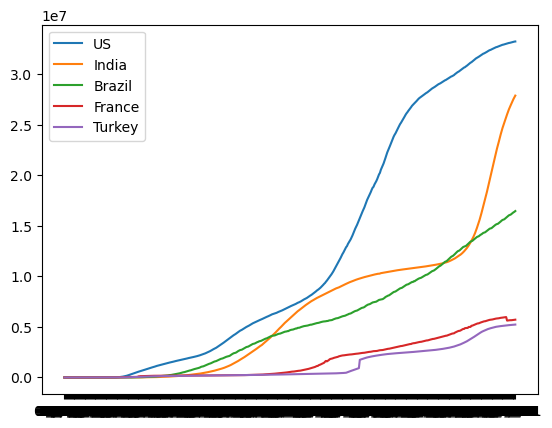

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

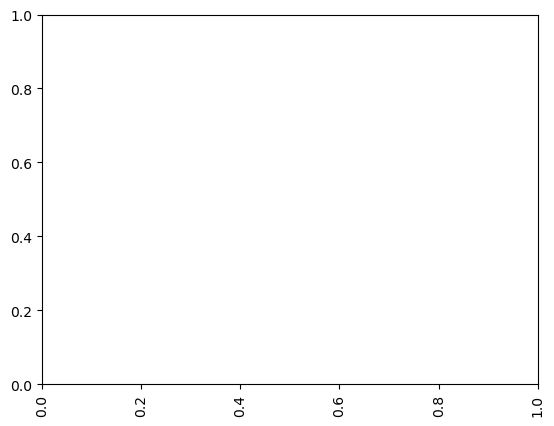

In [36]:
for country in top_countries:
    data = confirmed_cases[confirmed_cases['Country/Region'] == country].iloc[:,4:].sum() #select * from table where country = country
    plt.plot(data.index, data.values, label = country)

plt.legend()
plt.show()
plt.xticks(rotation=90)


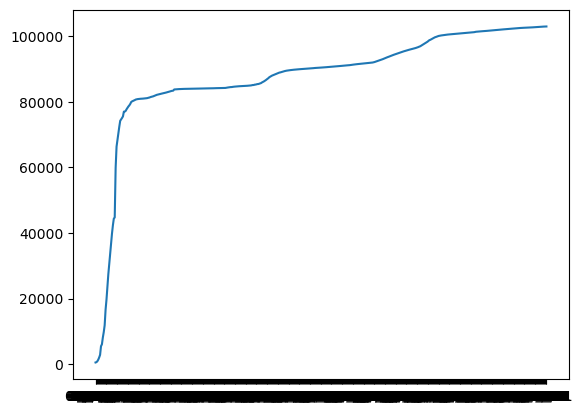

In [37]:
data = confirmed_cases[confirmed_cases['Country/Region'] == 'China'].iloc[:,4:].sum() #select * from table where country = 'US'
plt.plot(data.index, data.values, label = 'China')


## 3. Handling Missing Values

In [38]:
confirmed_cases.fillna(method='ffill', inplace=True)
deaths.fillna(method='ffill', inplace=True)
recovered_cases.fillna(method='ffill', inplace=True)

In [39]:
confirmed_cases.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/25/21           False
5/26/21           False
5/27/21           False
5/28/21           False
5/29/21           False
Length: 498, dtype: bool

In [40]:
deaths.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/25/21           False
5/26/21           False
5/27/21           False
5/28/21           False
5/29/21           False
Length: 498, dtype: bool

In [41]:
recovered_cases.isnull().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/25/21           False
5/26/21           False
5/27/21           False
5/28/21           False
5/29/21           False
Length: 498, dtype: bool

### 3.2 Data Cleaning

In [42]:
confirmed_cases['Province/State'].fillna("All Provinces", inplace=True)
deaths['Province/State'].fillna("All Provinces", inplace=True)
recovered_cases['Province/State'].fillna("All Provinces", inplace=True)

In [43]:
confirmed_cases.isnull().any()

Province/State    False
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/25/21           False
5/26/21           False
5/27/21           False
5/28/21           False
5/29/21           False
Length: 498, dtype: bool

In [44]:
recovered_cases.isnull().any()

Province/State    False
Country/Region    False
Lat               False
Long              False
1/22/20           False
                  ...  
5/25/21           False
5/26/21           False
5/27/21           False
5/28/21           False
5/29/21           False
Length: 498, dtype: bool

In [45]:
deaths.isnull().sum().sum()

0

## 4.Independent Dataset Analysis

### 4.1 Analyse the peak number of daily new cases for Germany, France, Italy (Which country has highest surge and when?)

In [46]:
# Logic Outside the python and SQL
# 1. Filter only specific country
# 2. Find out daily numbers and do summation 
# 3. Peak Date and Peak Cases

In [47]:
countries = ['Germany', 'France', 'Italy']
daily_new_cases = {}
for country in countries:
    country_data = confirmed_cases[confirmed_cases['Country/Region']==country]
    summed_daily_cases = country_data.iloc[:, 4:].sum(axis=0).diff().fillna(0) # if the country has multiple provinces then cumulative sum for the all provinces(individual cases for each day for each country)
    daily_new_cases[country] = summed_daily_cases

daily_new_cases

{'Germany': 1/22/20       0.0
 1/23/20       0.0
 1/24/20       0.0
 1/25/20       0.0
 1/26/20       0.0
             ...  
 5/25/21    2578.0
 5/26/21    4473.0
 5/27/21    6949.0
 5/28/21    6169.0
 5/29/21    4513.0
 Length: 494, dtype: float64,
 'France': 1/22/20        0.0
 1/23/20        0.0
 1/24/20        2.0
 1/25/20        1.0
 1/26/20        0.0
             ...   
 5/25/21     3155.0
 5/26/21    12657.0
 5/27/21    13933.0
 5/28/21    11274.0
 5/29/21    11527.0
 Length: 494, dtype: float64,
 'Italy': 1/22/20       0.0
 1/23/20       0.0
 1/24/20       0.0
 1/25/20       0.0
 1/26/20       0.0
             ...  
 5/25/21    3220.0
 5/26/21    3935.0
 5/27/21    4143.0
 5/28/21    3737.0
 5/29/21    3348.0
 Length: 494, dtype: float64}

In [48]:
summed_daily_cases

1/22/20       0.0
1/23/20       0.0
1/24/20       0.0
1/25/20       0.0
1/26/20       0.0
            ...  
5/25/21    3220.0
5/26/21    3935.0
5/27/21    4143.0
5/28/21    3737.0
5/29/21    3348.0
Length: 494, dtype: float64

In [49]:
peaks={}
for country, data in daily_new_cases.items():
    peak_dates = data.idxmax()
    peak_cases = data.max()
    peaks[country] = (peak_dates, peak_cases)

peaks

{'Germany': ('12/30/20', 49044.0),
 'France': ('04/11/2021', 117900.0),
 'Italy': ('11/13/20', 40902.0)}

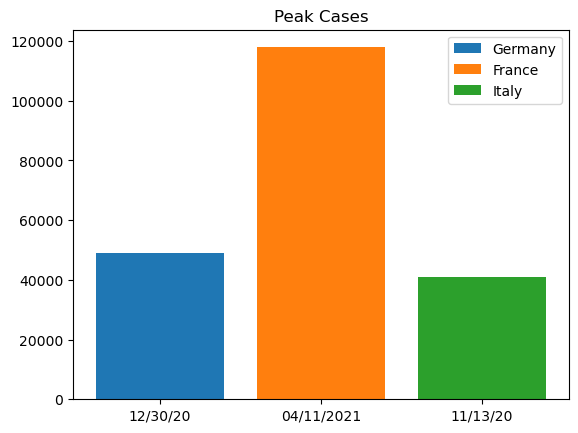

In [50]:
for country, data in peaks.items():
    plt.bar(data[0], data[1], label=country)
plt.legend()
plt.title("Peak Cases")
plt.show()

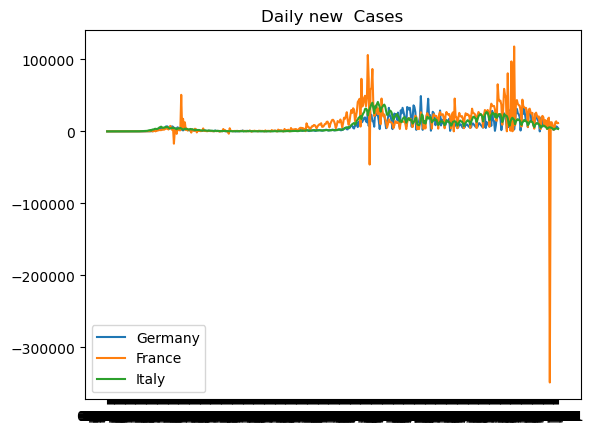

In [51]:
for country, data in daily_new_cases.items():
    plt.plot(data.index, data.values, label=country)

plt.legend()
plt.title("Daily new  Cases")
plt.show()


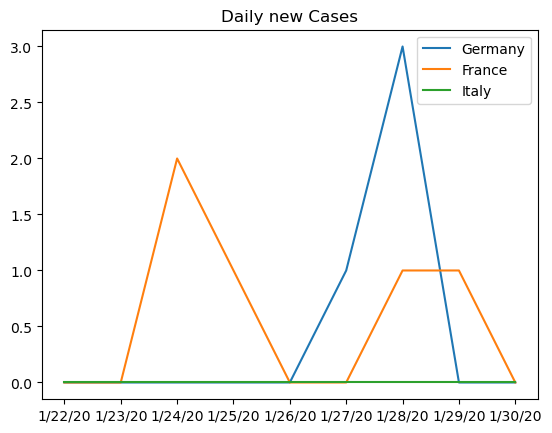

In [52]:
for country, data in daily_new_cases.items():
    plt.plot(data.loc['1/22/20':'1/30/20'].index, data.loc['1/22/20':'1/30/20'].values, label=country)

plt.legend()
plt.title("Daily new Cases")
plt.show()


In [53]:
# Logic Outside the python and SQL
# 1. Filter only specific country
# 2. Find out daily numbers and do summation 
# 3. Peak Date and Peak Cases

### 4.2 Compare recovery rate between Canada and Australia on 31 December 2020

In [54]:
for col in confirmed_cases.columns:
    if ("2020" in col or "20" in col) and ("12" in col) and ("31" in col):  # smart matching
        date_column = col
        break
print(date_column)

12/31/20


In [55]:
# --- Step 2: Calculate Recovery Rates using .loc ---
canada_confirmed   = confirmed_cases.loc[confirmed_cases['Country/Region']=='Canada', date_column].sum()
canada_recovered   = recovered_cases.loc[recovered_cases['Country/Region']=='Canada', date_column].sum()

australia_confirmed = confirmed_cases.loc[confirmed_cases['Country/Region']=='Australia', date_column].sum()
australia_recovered = recovered_cases.loc[recovered_cases['Country/Region']=='Australia', date_column].sum()

In [56]:
print("Confirmed Cases in Canada:",canada_confirmed)
print("Recovered Cases in Canada:",canada_recovered )
print()
print("Confirmed Cases in Australia:",australia_confirmed)
print("Recovered Cases in Australia:",australia_recovered )

Confirmed Cases in Canada: 584409
Recovered Cases in Canada: 493638

Confirmed Cases in Australia: 28425
Recovered Cases in Australia: 22565


In [57]:
# Recovery rate calculation
canada_rate = round((canada_recovered / canada_confirmed) * 100,2)
australia_rate = round((australia_recovered / australia_confirmed) * 100,2)
print("Recovery Rate in Canada:",canada_rate)
print()
print("Recovery Rate in Australia:",australia_rate)

Recovery Rate in Canada: 84.47

Recovery Rate in Australia: 79.38


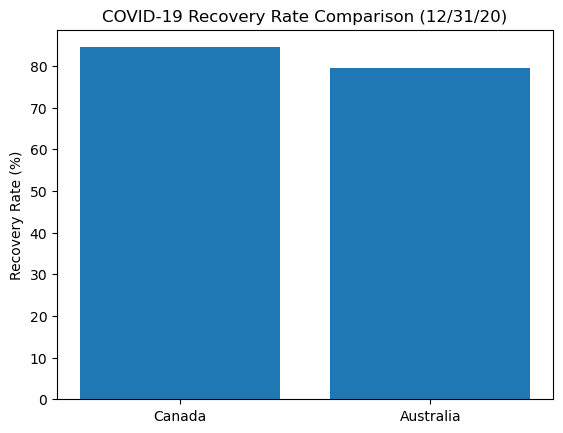

In [58]:
import matplotlib.pyplot as plt

# Bar chart comparison
countries = ["Canada", "Australia"]
rates = [canada_rate, australia_rate]

plt.bar(countries, rates)
plt.ylabel("Recovery Rate (%)")
plt.title(f"COVID-19 Recovery Rate Comparison ({date_column})")
plt.show()


### 4.3 Death Rate Comparision in Different Provinces of Canada

In [59]:
latest_date  = confirmed_cases.columns[-1]
print("Latest date column in dataset:", latest_date)

Latest date column in dataset: 5/29/21


In [60]:
# ---- 2. Filter only Canada rows and keep Province + latest date ----
can_conf = confirmed_cases.loc[confirmed_cases["Country/Region"] == "Canada",["Province/State", latest_date]].copy()

can_deaths = deaths.loc[deaths["Country/Region"] == "Canada",["Province/State", latest_date]].copy()

print(can_conf)
print(can_deaths)

               Province/State  5/29/21
39                    Alberta   226855
40           British Columbia   143581
41           Diamond Princess        0
42             Grand Princess       13
43                   Manitoba    50499
44              New Brunswick     2191
45  Newfoundland and Labrador     1302
46      Northwest Territories      127
47                Nova Scotia     5530
48                    Nunavut      648
49                    Ontario   537138
50       Prince Edward Island      200
51                     Quebec   369728
52     Repatriated Travellers       13
53               Saskatchewan    46464
54                      Yukon       84
               Province/State  5/29/21
39                    Alberta     2214
40           British Columbia     1692
41           Diamond Princess        1
42             Grand Princess        0
43                   Manitoba     1045
44              New Brunswick       43
45  Newfoundland and Labrador        6
46      Northwest Territo

In [61]:
can_conf.rename(columns={latest_date: "confirmed"}, inplace=True)
can_deaths.rename(columns={latest_date: "deaths"}, inplace=True)

In [62]:
# ---- 3. Merge confirmed & deaths on Province/State ----
canada = can_conf.merge(can_deaths, on="Province/State")

In [63]:
#---- 4. Compute death rate per province ----
# Handle division by zero safely
canada["death_rate"] = np.where(
    canada["confirmed"] > 0,
    canada["deaths"] / canada["confirmed"],
    np.nan
)

In [64]:
# ---- 5. Identify provinces with highest & lowest death rate ----
highest_row = canada.loc[canada["death_rate"].idxmax()]
lowest_row  = canada.loc[canada["death_rate"].idxmin()]


In [65]:
print(canada[["Province/State", "confirmed", "deaths", "death_rate"]])

               Province/State  confirmed  deaths  death_rate
0                     Alberta     226855    2214    0.009760
1            British Columbia     143581    1692    0.011784
2            Diamond Princess          0       1         NaN
3              Grand Princess         13       0    0.000000
4                    Manitoba      50499    1045    0.020693
5               New Brunswick       2191      43    0.019626
6   Newfoundland and Labrador       1302       6    0.004608
7       Northwest Territories        127       0    0.000000
8                 Nova Scotia       5530      84    0.015190
9                     Nunavut        648       4    0.006173
10                    Ontario     537138    8698    0.016193
11       Prince Edward Island        200       0    0.000000
12                     Quebec     369728   11125    0.030090
13     Repatriated Travellers         13       0    0.000000
14               Saskatchewan      46464     537    0.011557
15                      

In [66]:
print(f"{highest_row['Province/State']} → {highest_row['death_rate']:.4f}")

Quebec → 0.0301


In [67]:
print(f"{lowest_row['Province/State']} → {lowest_row['death_rate']:.4f}")

Grand Princess → 0.0000


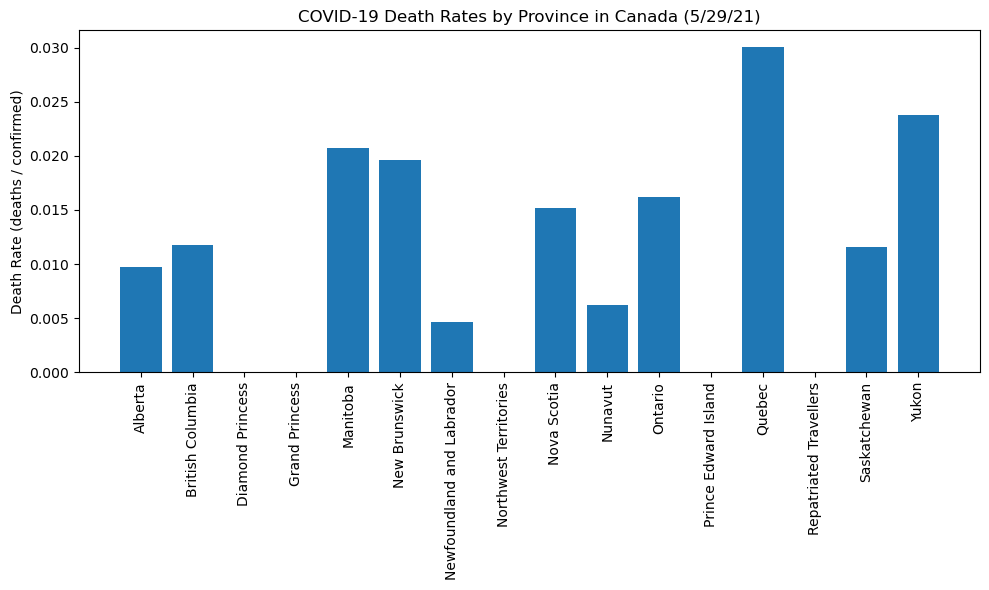

In [68]:
# ---- 6. Optional: Bar chart of death rates by province ----
plt.figure(figsize=(10, 6))
plt.bar(canada["Province/State"], canada["death_rate"])
plt.xticks(rotation=90)
plt.ylabel("Death Rate (deaths / confirmed)")
plt.title(f"COVID-19 Death Rates by Province in Canada ({latest_date})")
plt.tight_layout()
plt.show()

## 5. Data Transformation  

### 5.1 Convert deaths data into long format from wide format

In [69]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,All Provinces,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,All Provinces,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,All Provinces,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,All Provinces,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,All Provinces,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Turks and Caicos Islands,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,Turks and Caicos Islands,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,Turks and Caicos Islands,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,Turks and Caicos Islands,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [70]:
import pandas as pd

# Load the deaths dataset
deaths = pd.read_excel("covid_19_dataset.xlsx", sheet_name=1)

# Identify date columns (from 5th column onward)
date_cols = deaths.columns[4:]

# ---- Transform to long format ----
deaths_long = deaths.melt(
    id_vars=["Province/State", "Country/Region", "Lat", "Long"],
    value_vars=date_cols,
    var_name="Date",
    value_name="Deaths"
)
# Convert Date to datetime
deaths_long["Date"] = pd.to_datetime(deaths_long["Date"])
deaths_long.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


### 5.2 What is the total number of deaths reported per country up to the current date?

In [71]:
# Latest available date in dataset
latest_date = deaths_long["Date"].max()
print("Latest date found in data:", latest_date)





Latest date found in data: 2021-12-05 00:00:00


In [72]:
# Total deaths per country for latest date
total_deaths_per_country = (
    deaths_long.loc[deaths_long["Date"] == latest_date]
    .groupby("Country/Region")["Deaths"]
    .sum()
    .sort_values(ascending=False)
)

In [73]:
print("\nTotal deaths per country as of latest date:")
print(total_deaths_per_country)



Total deaths per country as of latest date:
Country/Region
US                  32814784
India               23703665
Brazil              15359397
France               5882882
Turkey               5072462
                      ...   
Vanuatu                    4
Marshall Islands           4
Samoa                      3
Micronesia                 1
Kiribati                   0
Name: Deaths, Length: 193, dtype: int64


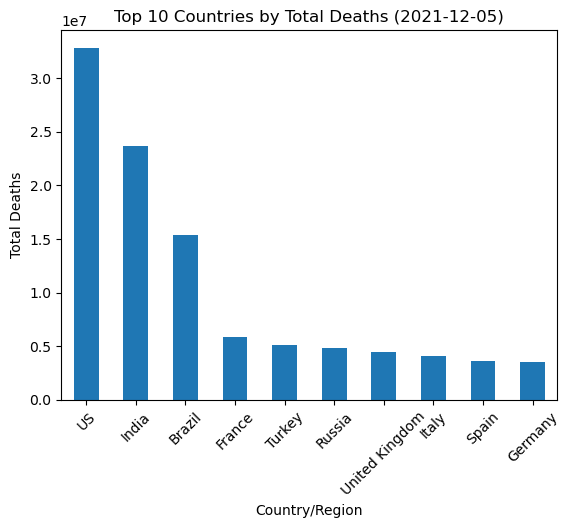

In [74]:
total_deaths_per_country.head(10).plot(kind="bar")
plt.ylabel("Total Deaths")
plt.title(f"Top 10 Countries by Total Deaths ({latest_date.date()})")
plt.xticks(rotation=45)
plt.show()

### 5.3  What are the top 5 countries with the highest average daily deaths?

In [75]:
# Calculate daily new deaths per country by differencing dates
deaths_daily = (
    deaths_long
    .groupby(["Country/Region", "Date"])["Deaths"]
    .sum()
    .groupby(level=0)          # for each country independently
    .diff()                    # daily change = new deaths on that day
    .reset_index(name="Daily_Deaths")
)

# Remove negative values that might appear from reporting corrections
deaths_daily["Daily_Deaths"] = deaths_daily["Daily_Deaths"].clip(lower=0)


In [76]:
avg_daily_deaths = (
    deaths_daily.groupby("Country/Region")["Daily_Deaths"]
    .mean()
    .sort_values(ascending=False)
)

print("\nTop 5 countries with highest average daily deaths:\n")
print(round(avg_daily_deaths.head(5),2))



Top 5 countries with highest average daily deaths:

Country/Region
US        673120.27
India     549068.90
Brazil    355066.50
France    138140.35
Russia    102748.81
Name: Daily_Deaths, dtype: float64


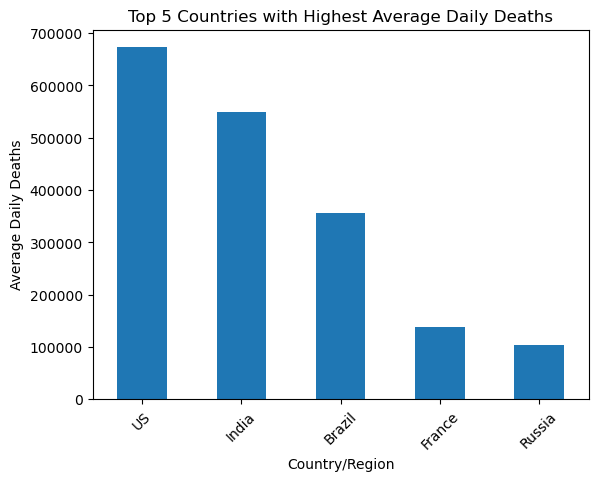

In [77]:
avg_daily_deaths.head(5).plot(kind="bar")
plt.ylabel("Average Daily Deaths")
plt.title("Top 5 Countries with Highest Average Daily Deaths")
plt.xticks(rotation=45)
plt.show()

### 5.4  How have the total deaths evolved over time in the United States?

In [78]:
# Filter U.S. and aggregate across all states for each date
us_deaths_over_time = (
    deaths_long[deaths_long["Country/Region"] == "US"]
    .groupby("Date")["Deaths"]
    .sum()
    .reset_index()
)

print("\nEvolution of total deaths in the US over time:")
print(us_deaths_over_time.head())



Evolution of total deaths in the US over time:
        Date   Deaths
0 2020-01-02        8
1 2020-01-03       32
2 2020-01-04   224560
3 2020-01-05  1115946
4 2020-01-06  1816154


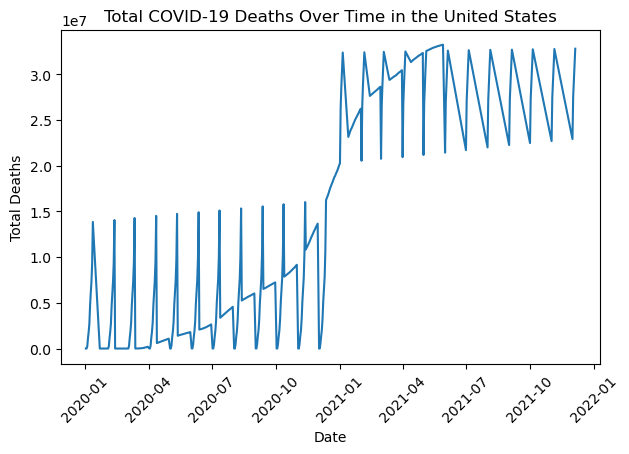

In [79]:
plt.plot(us_deaths_over_time["Date"], us_deaths_over_time["Deaths"])
plt.title("Total COVID-19 Deaths Over Time in the United States")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. Data Merging

### 6.1 All the 3 tables getting merged

In [80]:
# ---- Confirmed cases ----
confirmed_long = confirmed_cases.melt(
    id_vars=["Province/State","Country/Region","Lat","Long"],
    value_vars=confirmed_cases.columns[4:],
    var_name="Date",
    value_name="Confirmed"
)

# ---- Deaths ----
deaths_long = deaths.melt(
    id_vars=["Province/State","Country/Region","Lat","Long"],
    value_vars=deaths.columns[4:],
    var_name="Date",
    value_name="Deaths"
)

# ---- Recoveries ----
recovered_long = recovered_cases.melt(
    id_vars=["Province/State","Country/Region","Lat","Long"],
    value_vars=recovered_cases.columns[4:],
    var_name="Date",
    value_name="Recovered"
)

# Convert to datetime
confirmed_long["Date"] = pd.to_datetime(confirmed_long["Date"])
deaths_long["Date"] = pd.to_datetime(deaths_long["Date"])
recovered_long["Date"] = pd.to_datetime(recovered_long["Date"])


In [81]:
# Merge confirmed & deaths first
covid_merged = confirmed_long.merge(
    deaths_long, on=["Country/Region","Province/State","Lat","Long","Date"], how="outer"
)

# Merge with recoveries
covid_merged = covid_merged.merge(
    recovered_long, on=["Country/Region","Province/State","Lat","Long","Date"], how="outer"
)

covid_merged.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,All Provinces,Afghanistan,33.93911,67.709953,2020-01-22,0.0,NaN,0.0
1,All Provinces,Albania,41.15330,20.168300,2020-01-22,0.0,NaN,0.0
2,All Provinces,Algeria,28.03390,1.659600,2020-01-22,0.0,NaN,0.0
3,All Provinces,Andorra,42.50630,1.521800,2020-01-22,0.0,NaN,0.0
4,All Provinces,Angola,-11.20270,17.873900,2020-01-22,0.0,NaN,0.0


In [82]:
"Final shape:", covid_merged.shape

('Final shape:', (239502, 8))

### 6.2 Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

In [83]:
# Convert date to proper datetime if not already
covid_merged["Date"] = pd.to_datetime(covid_merged["Date"])

# Create Year-Month column for monthly aggregation
covid_merged["Month"] = covid_merged["Date"].dt.to_period("M")


In [84]:
# Monthly sum of cases for every country
monthly_summary = (covid_merged
                   .groupby(["Country/Region", "Month"])
                   [["Confirmed", "Deaths", "Recovered"]]
                   .sum()
                   .reset_index()
                  )

monthly_summary.head()


,Country/Region,Month,Confirmed,Deaths,Recovered
0,Afghanistan,2020-01,0.0,252263.0,0.0
1,Afghanistan,2020-02,6.0,253826.0,0.0
2,Afghanistan,2020-03,1164.0,256554.0,26.0
3,Afghanistan,2020-04,27074.0,279293.0,2927.0
4,Afghanistan,2020-05,225674.0,442303.0,24129.0


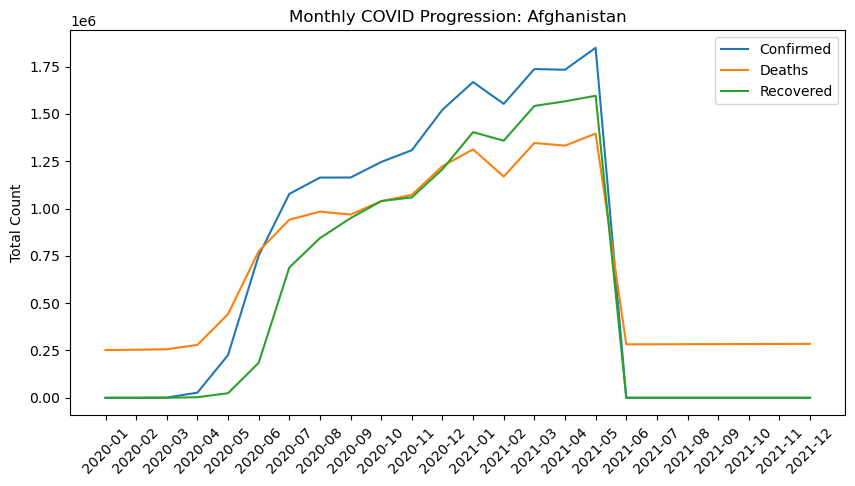

In [85]:
country = "Afghanistan"  # <-- change for any country

plot_data = monthly_summary[monthly_summary["Country/Region"] == country]

plt.figure(figsize=(10,5))
plt.plot(plot_data["Month"].astype(str), plot_data["Confirmed"], label="Confirmed")
plt.plot(plot_data["Month"].astype(str), plot_data["Deaths"], label="Deaths")
plt.plot(plot_data["Month"].astype(str), plot_data["Recovered"], label="Recovered")

plt.title(f"Monthly COVID Progression: {country}")
plt.xticks(rotation=45)
plt.ylabel("Total Count")
plt.legend()
plt.show()


### 6.3 Analysis in for United States, Italy and Brazil.

In [86]:
countries = ["US", "Italy", "Brazil"]

subset = monthly_summary[monthly_summary["Country/Region"].isin(countries)]
subset.head()

,Country/Region,Month,Confirmed,Deaths,Recovered
552,Brazil,2020-01,0.0,25512632.0,0.0
553,Brazil,2020-02,5.0,25726882.0,0.0
554,Brazil,2020-03,37127.0,26022824.0,290.0
555,Brazil,2020-04,1048506.0,27123999.0,400893.0
556,Brazil,2020-05,7944285.0,32805161.0,3206734.0


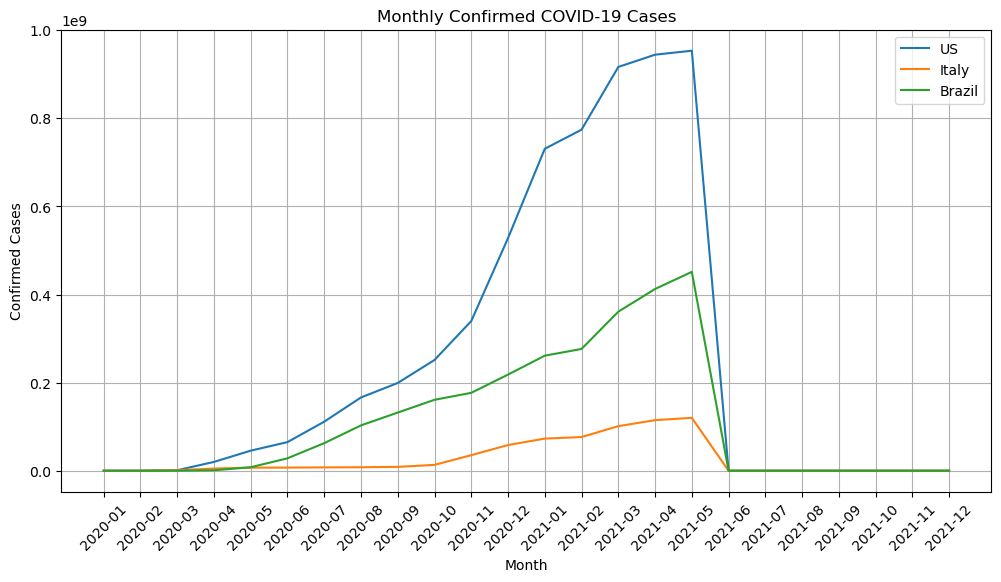

In [87]:
#Confirmed Cases Trend
plt.figure(figsize=(12,6))
for c in countries:
    data = subset[subset["Country/Region"] == c]
    plt.plot(data["Month"].astype(str), data["Confirmed"], label=c)

plt.title("Monthly Confirmed COVID-19 Cases")
plt.xlabel("Month")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


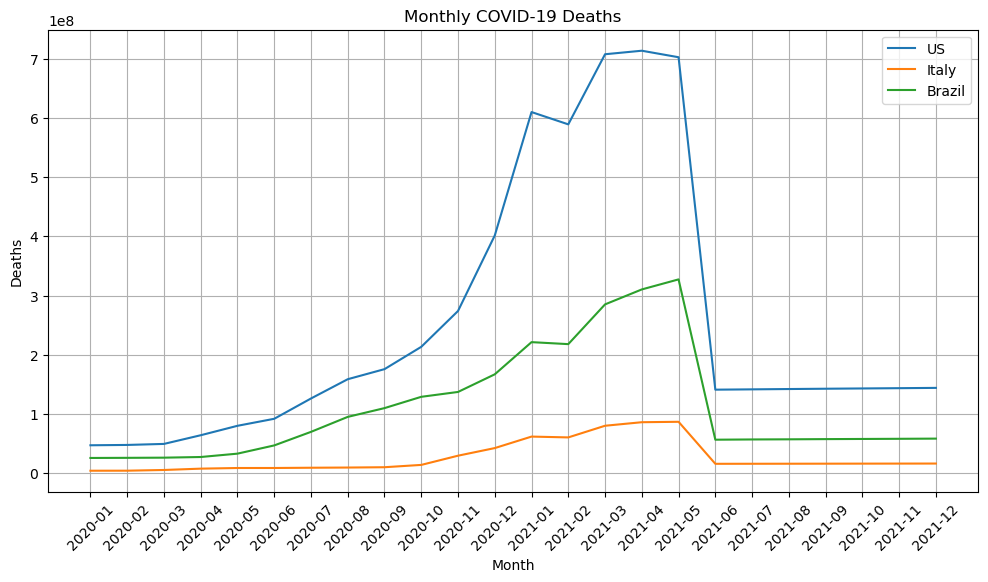

In [88]:
# Deaths Trend
plt.figure(figsize=(12,6))
for c in countries:
    data = subset[subset["Country/Region"] == c]
    plt.plot(data["Month"].astype(str), data["Deaths"], label=c)

plt.title("Monthly COVID-19 Deaths")
plt.xlabel("Month")
plt.ylabel("Deaths")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


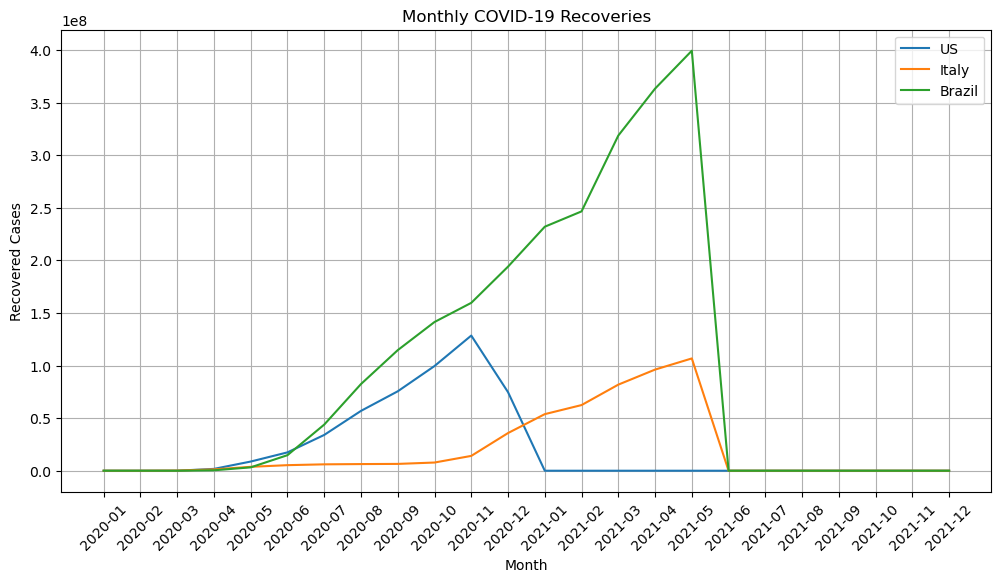

In [89]:
# Recoveries Trend
plt.figure(figsize=(12,6))
for c in countries:
    data = subset[subset["Country/Region"] == c]
    plt.plot(data["Month"].astype(str), data["Recovered"], label=c)

plt.title("Monthly COVID-19 Recoveries")
plt.xlabel("Month")
plt.ylabel("Recovered Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 7 Combined Data Analysis

### 7.1. Countries with the Highest Average Death Rate in 2020

In [90]:
# Filter dataset for 2020 only
data_2020 = covid_merged[covid_merged["Date"].dt.year == 2020]

# Group by country and compute total confirmed + deaths for entire 2020
country_stats_2020 = (
    data_2020.groupby("Country/Region")[["Confirmed", "Deaths"]]
    .sum()
)

# Compute average death rate
country_stats_2020["Death_Rate"] = country_stats_2020["Deaths"] / country_stats_2020["Confirmed"]

# Top 3 countries
top3_death_rate_2020 = country_stats_2020.sort_values("Death_Rate", ascending=False).head(3)
print(top3_death_rate_2020)


                 Confirmed      Deaths  Death_Rate
Country/Region                                    
Afghanistan      8485542.0   8485542.0         1.0
Pakistan        66731120.0  66731120.0         1.0
Nepal           21241730.0  21241730.0         1.0


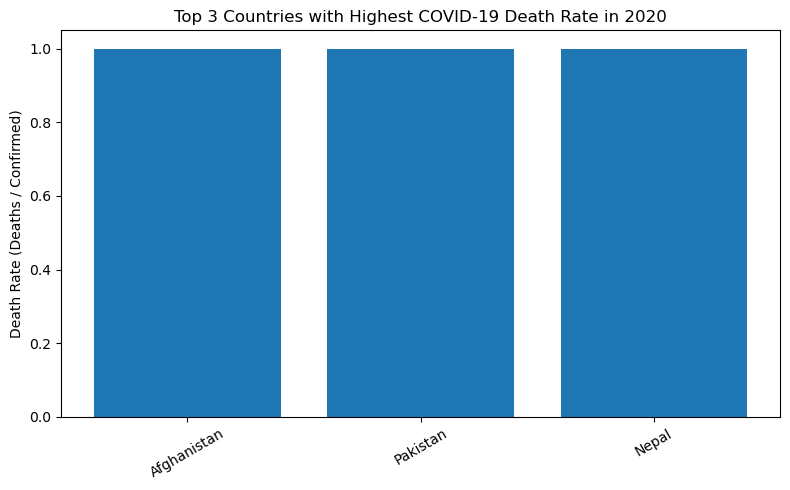

In [91]:
#Graph for Top 3 Countries by Average Death Rate in 2020

# Filter 2020 data
data_2020 = covid_merged[covid_merged["Date"].dt.year == 2020]

country_stats_2020 = (
    data_2020.groupby("Country/Region")[["Confirmed","Deaths"]].sum()
)
country_stats_2020["Death_Rate"] = country_stats_2020["Deaths"] / country_stats_2020["Confirmed"]

# Top 3 high death-rate countries
top3 = country_stats_2020.sort_values("Death_Rate",ascending=False).head(3)

# Plot
plt.figure(figsize=(8,5))
plt.bar(top3.index, top3["Death_Rate"])
plt.title("Top 3 Countries with Highest COVID-19 Death Rate in 2020")
plt.ylabel("Death Rate (Deaths / Confirmed)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### 7.2. Recoveries vs Deaths in South Africa

In [92]:
# Filter for South Africa
sa = covid_merged[covid_merged["Country/Region"] == "South Africa"]

# Total recoveries vs deaths (entire dataset)
sa_totals = sa[["Recovered", "Deaths"]].sum()
print(sa_totals)

recovery_vs_death_ratio = sa_totals["Recovered"] / sa_totals["Deaths"]
print("\nRecovery-to-Death Ratio:", recovery_vs_death_ratio)


Recovered    310037573.0
Deaths       345940039.0
dtype: float64

Recovery-to-Death Ratio: 0.8962176621596554


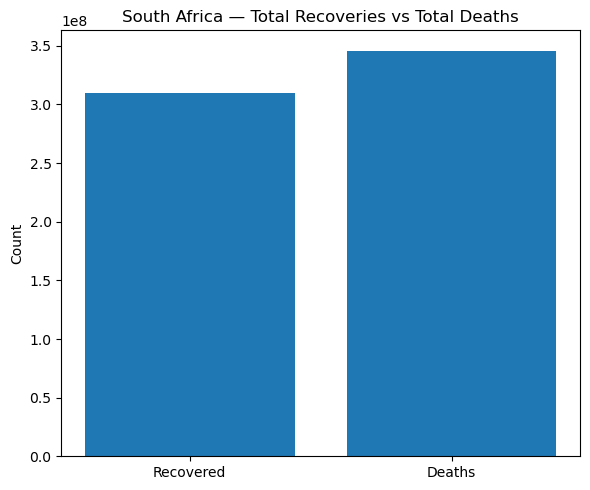

In [93]:
# Graph – Recoveries vs Deaths in South Africa
# Filter South Africa totals
sa = covid_merged[covid_merged["Country/Region"]=="South Africa"]
totals = sa[["Recovered","Deaths"]].sum()

# Plot comparison
plt.figure(figsize=(6,5))
plt.bar(["Recovered","Deaths"],[totals["Recovered"],totals["Deaths"]])
plt.title("South Africa — Total Recoveries vs Total Deaths")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### 7.3. U.S. Monthly Recovery Ratio (Mar 2020 – May 2021)

In [94]:
# Extract United States data only
us = covid_merged[covid_merged["Country/Region"] == "US"].copy()

# Monthly aggregation
us["Month"] = us["Date"].dt.to_period("M")
us_monthly = us.groupby("Month")[["Confirmed", "Recovered"]].sum()

# Recovery ratio
us_monthly["Recovery_Ratio"] = us_monthly["Recovered"] / us_monthly["Confirmed"]

# Filter March 2020 → May 2021
us_period_focus = us_monthly.loc["2020-03":"2021-05"]

# Highest recovery ratio month
best_month = us_period_focus["Recovery_Ratio"].idxmax()
best_value = us_period_focus["Recovery_Ratio"].max()

print(us_period_focus)
print("\nHighest Recovery Ratio:", best_month, "=", best_value)


           Confirmed    Recovered  Recovery_Ratio
Month                                            
2020-03    1120122.0      19730.0        0.017614
2020-04   19959287.0    1747977.0        0.087577
2020-05   45533906.0    8720047.0        0.191507
2020-06   64964762.0   17434297.0        0.268365
2020-07  111371152.0   34028380.0        0.305540
2020-08  166357378.0   56877502.0        0.341899
2020-09  199220181.0   75486815.0        0.378911
2020-10  251406215.0   99506279.0        0.395799
2020-11  339796331.0  128470711.0        0.378082
2020-12  528139775.0   74680002.0        0.141402
2021-01  730894746.0          0.0        0.000000
2021-02  774254261.0          0.0        0.000000
2021-03  916643837.0          0.0        0.000000
2021-04  944543693.0          0.0        0.000000
2021-05  953529915.0          0.0        0.000000

Highest Recovery Ratio: 2020-10 = 0.3957988031441466


Highest Recovery Month: 2020-10 : 0.3957988031441466


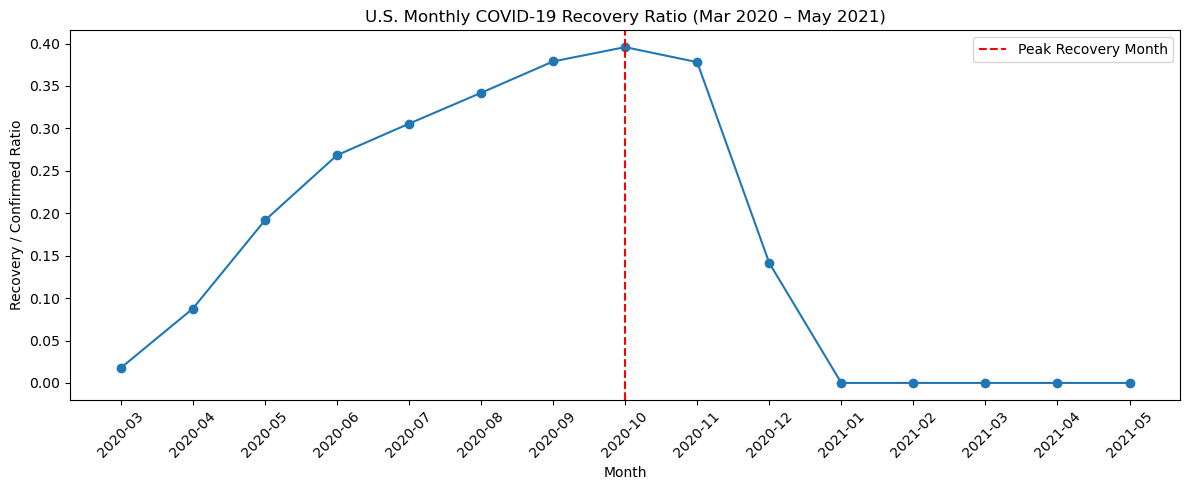

In [95]:
# Graph – U.S. Monthly Recovery Ratio (Mar 2020–May 2021)
country_name = "US"  # <--- change if needed

# Monthly aggregation
us = covid_merged[covid_merged["Country/Region"]==country_name].copy()
us["Month"] = us["Date"].dt.to_period("M")

us_monthly = us.groupby("Month")[["Confirmed","Recovered"]].sum()
us_monthly["Recovery_Ratio"] = us_monthly["Recovered"] / us_monthly["Confirmed"]

# Filter study window
us_period = us_monthly.loc["2020-03":"2021-05"].dropna()

# Identify peak month
best_month = us_period["Recovery_Ratio"].idxmax()
best_value = us_period["Recovery_Ratio"].max()

print("Highest Recovery Month:",best_month,":",best_value)

# Plot
plt.figure(figsize=(12,5))
plt.plot(us_period.index.astype(str), us_period["Recovery_Ratio"],marker="o")
plt.axvline(str(best_month),color="red",linestyle="--",label="Peak Recovery Month")

plt.title("U.S. Monthly COVID-19 Recovery Ratio (Mar 2020 – May 2021)")
plt.ylabel("Recovery / Confirmed Ratio")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
